<a href="https://colab.research.google.com/github/fgabim19/Curso-Ciencia-de-Datos/blob/main/A0_introduccion_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch

`torch.arrange()` lo que hace es crear una clase tensor para un arreglo que va desde sero hasta el numero que especifiquemos.

In [ ]:
x = torch.arange(12)
x

Para saber las dimensiones de la variable utilizamos `.shape`.<br> Al ser un vector de 12x1.

In [ ]:
x.shape

`.numel()` para saber cantidad de elementos del vector.

In [ ]:
x.numel()

`.reshape(n, m)` Si queremos reformar el vector para que tenga **n** filas y **m** columna.<br>
Si queremos tener 4 filas y no nos interesa el numero de columnas, ponemos `.reshape(4, -1)`

In [ ]:
x = x.reshape(3, 4)
x

In [ ]:
x = x.reshape(4, -1)
x

Muchas veces no tenenmos los datos y queremos generar la estructura del tensor, para eso usamos `torch.zeros()` o `torch.ones()`, en lo que le especificamos como seria el tensor.<br>
En el caso que se muestra es un tensor de grado 2, donde se tiene dos matrices de 3x4, siendo las matrices como las capas.

In [ ]:
torch.zeros((2, 3, 4))

In [ ]:
torch.ones((2,3,4))

tambien podemos poner aleatorios desde una distribucion Normal

In [ ]:
torch.randn(3,4)

Si queremos ponerlos uno por uno los valores de los elementos.

In [ ]:
torch.tensor([[2, 1, 3, 4], [1, 4, 4, 5], [4, 7, 4, 5]])

### Operaciones

In [ ]:
x = torch.tensor([1, 2, 4, 7])
y = torch.tensor([2, 2, 3, 5])


operaciones elemento a elemento.

In [ ]:
x + y, x - y, x * y, x/y, x**y

operaciones matriciales.

In [ ]:
torch.dot(x,y)   # producto escalar

In [ ]:
torch.exp(x)

## Brocasting

Que pasa si queremos sumar cosas que no tengan las mismas dimensiones, en general esto no se podria, pero lo que hace el sistema es tomar el primer elemento de la fila y sumarlo a toda la columna.<br>
Esto es lo que se denomina **Brocasting**

In [ ]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a, b

In [ ]:
a + b

In [ ]:
a + 5

## Indices
Podemos utizar pedazos de un tensor, por ejemplo `[-1]` si queremos el ultimo fila, o un rango `[1:3]`

In [ ]:
X = torch.arange(12).reshape(4,3)

In [ ]:
X[-1], X[1:3]

In [ ]:
X[1:3] = 9
X

In [ ]:
X[0:2 ,1:]=12
X

## Guardado en Memoria
Pasa que el lugar asignado para guardad una variable no es eredado por la demas operaciones que se le realizan a esa variable entonces quedaran variables que no son utilizadas por el sistema ocupando memoria.
En el ejemplo podemos ver que la variable y con la funcion `id()` vemos el lugar en memoria que ocupa y en este caso no es igual luego de sumar otro tensor.

In [ ]:
before = id(y)
y = y + x
id(y)==before

In [ ]:
#Solucion
Z = torch.zeros_like(y)
print("id(Z):", id(Z))
Z[:] = x + y
print("id(Z):", id(Z))

In [ ]:
# Solucion 2 utilizando +=
before = id(x)
x += y
id(x) == before

## Conversion a otros objetos
Para trabajar en otros modelos, puede que sea necesario tranformar a otros tipos de objetos.

In [ ]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

podemos extraer los elementos de un tensor y que este siga siendo un objeto tensor o que pierda esa propiedad.

In [ ]:
# elemtos de un tensor
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

## Diferenciacion Automatica
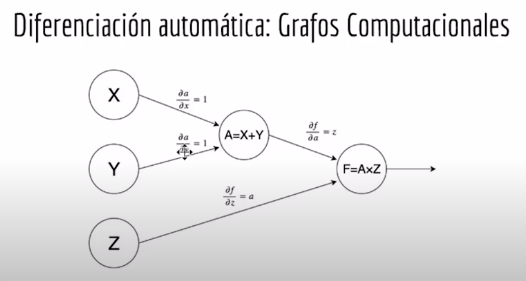

La forma en que deriva **Pytorch** es utilizando grafos computacionales, cada nodo es una operacion, las variables van a ser tensores que van a ir moviendose a lo largo de grafo.
Cuando se va a hacia adelante se llama **Forward**, donde se va a ir calculando los valores de las operaciones.
Cuando se va a hacia atras se llama **Backward**, donde se va a hacer la derivada parcial respecto a las entradas que tenia el nodo.
Los resultados de las derivadas parciales se guardan en un parametro especial que tiene los tensores que se llama **grad**, entonces dentro de los tensores se tiene un atributo **grad** donde se guardan las derivadas.


In [ ]:
x = torch.arange(4.0)
x

activamos el atributo grad.

In [ ]:
x.requires_grad_(True)
x.grad

In [ ]:
y = 2 * torch.dot(x, x)
y 

El metodo para derivar en pytorch se llama `backward()`. Lo que hace `backward()` es derivar el nodo respecto a la variable y el atributo lo guarda en x que es la hoja del grad.

In [ ]:
y.backward()
x.grad

In [ ]:
x.grad == 4 * x

In [ ]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

algo un poquito mas complicado

In [ ]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c


In [ ]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()


In [ ]:
a.grad == d/a